## Observations and Insights 

findings:

1-I analysed the data from a randomly selected mouse, comparing the tumour volume against the timepoint. It was clear that over time, the tumour volume increased at an relatively steady rate.

2-When performing the correlation between weight and volume for mice using the Capomulin drug, it returned a correlation of 0.53. This figure just falls into the category of having moderate strength. 

3-The drugs used on the mice were not evenly spread. There seems to be a big variance between the drug used on the most number of mice, in comparison to the drug used on the least amount of mice. I feel this uneven spread of the drugs used may not give accurate data.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_and_study_df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")



In [2]:
# Checking the number of mice.
combined_mouse_and_study_df.nunique()

Mouse ID                249
Drug Regimen             10
Sex                       2
Age_months               24
Weight (g)               16
Timepoint                10
Tumour Volume (mm3)    1644
Metastatic Sites          5
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_and_study_df.duplicated(subset=["Mouse ID", "Timepoint"]).sum()


5

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_mouse_and_study_df.loc[combined_mouse_and_study_df.duplicated(subset=["Mouse ID", "Timepoint"]), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_and_study_df = combined_mouse_and_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
combined_mouse_and_study_df = combined_mouse_and_study_df.reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
combined_mouse_and_study_df.count()

index                  1888
Mouse ID               1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean_table = combined_mouse_and_study_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
median_table = combined_mouse_and_study_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
var_table = combined_mouse_and_study_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
std_table = combined_mouse_and_study_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
sem_table = combined_mouse_and_study_df.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()

mean_table


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumour Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

combined_mouse_and_study_df_groupby_regimen = pd.DataFrame({
    "Tumour Volume mean": mean_table,
    "Tumour Volume median": median_table,
    "Tumour Volume variance":var_table,
    "Tumour Volume std": std_table,
    "Tumour Volume SEM": sem_table
})
combined_mouse_and_study_df_groupby_regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_groupby = combined_mouse_and_study_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


## Bar and Pie Charts

Text(0, 0.5, 'Numbers of mice')

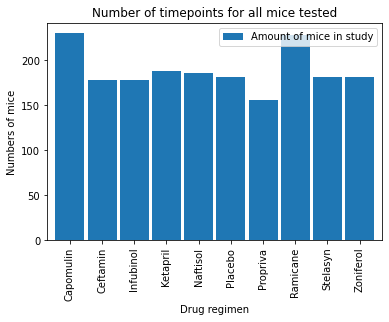

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count_drug_regimen_count = combined_mouse_and_study_df.groupby("Drug Regimen")["Sex"].count()
timepoint_count_drug_regimen_count_df = pd.DataFrame ({
    "Amount of mice in study" : timepoint_count_drug_regimen_count
})
timepoint_count_drug_regimen_count_df

pandas_bar_chart = timepoint_count_drug_regimen_count_df.plot.bar(width=0.9)
pandas_bar_chart.set_title("Number of timepoints for all mice tested")
pandas_bar_chart.set_xlabel("Drug regimen")
pandas_bar_chart.set_ylabel("Numbers of mice")



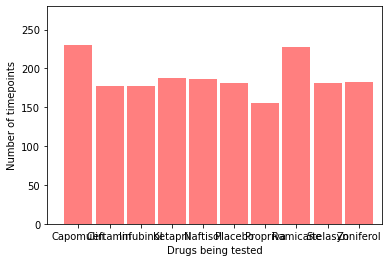

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
amount_of_mice = timepoint_count_drug_regimen_count_df["Amount of mice in study"]


x_axis = np.arange(len(amount_of_mice))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.bar(x_axis, amount_of_mice, color = "r", alpha = 0.5, align = "center", width=0.9 )
plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(amount_of_mice)+50)
plt.xlabel("Drugs being tested")
plt.ylabel("Number of timepoints")
# plt.title("Number of timepoints for all mice tested")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

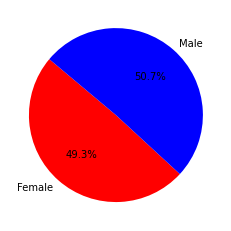

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = combined_mouse_and_study_df.groupby("Sex").count()
male_v_female
female_numbers = male_v_female.iat[0,0]

male_numbers = male_v_female.iat[1,0]
size=[female_numbers, male_numbers]

male_v_female["Mouse ID"]
labels = ["Female", "Male"]
colours = ["red", "blue"]
plt.pie(size, labels=labels, colors=colours, autopct="%1.1f%%", startangle=140)
# plt.title("Amount of male and female mice")
plt.show

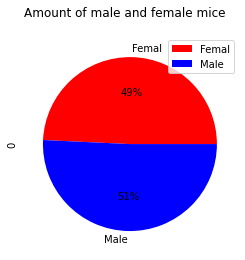

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colours =["red", "blue"]
labels = ["Femal", "Male"]
male_v_female_pandas = pd.DataFrame({female_numbers, male_numbers})
plot = male_v_female_pandas.plot.pie(subplots=True, colors=colours, autopct='%1.0f%%', labels=labels, title = "Amount of male and female mice" )

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_mouse_and_study_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
tumour_volme_at_last_timepoint_df = last_timepoint.merge(combined_mouse_and_study_df, on=(['Mouse ID','Timepoint']), how="left")
tumour_volme_at_last_timepoint_df

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a262,45,483,Placebo,Female,17,29,70.717621,4
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
4,a366,30,500,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
244,z435,10,1862,Propriva,Female,12,26,48.710661,0
245,z578,45,84,Ramicane,Male,11,16,30.638696,0
246,z581,45,1872,Infubinol,Female,24,25,62.754451,3
247,z795,45,1882,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumour vol data (for plotting)
##please not I got this code with the help of an online tutor. I am still figuring it out so it is not complete. I have a feeling the code below is directly from the answers
promising_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumour_volume =[]
for drug in promising_drugs:
    final_tumour_vol = tumour_volme_at_last_timepoint_df.loc[tumour_volme_at_last_timepoint_df["Drug Regimen"] == drug, "Tumour Volume (mm3)"]
    tumour_volume.append(final_tumour_vol)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumour_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(len(final_tumour_vol))
    outliers = final_tumour_vol.loc[(final_tumour_vol < lower_bound) | (final_tumour_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumour Volume (mm3), dtype: float64)


## Line and Scatter Plots

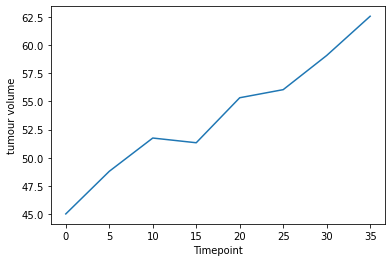

In [15]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
g989_mouse_id = combined_mouse_and_study_df.loc[combined_mouse_and_study_df["Mouse ID"] == "g989"]


plt.plot(g989_mouse_id["Timepoint"],g989_mouse_id["Tumour Volume (mm3)"])
# plt.title("tumour volume v timeplot for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("tumour volume")
plt.show()

Text(0, 0.5, 'Tumour volume')

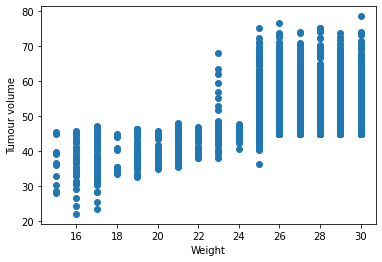

In [16]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
plt.scatter(combined_mouse_and_study_df["Weight (g)"], combined_mouse_and_study_df["Tumour Volume (mm3)"])
plt.title="tumour voume vs weight"
plt.xlabel("Weight")
plt.ylabel("Tumour volume")

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
capomulin_weight_volume = combined_mouse_and_study_df.loc[combined_mouse_and_study_df["Drug Regimen"] == "Capomulin"]
correlation_linear_weight = capomulin_weight_volume.iloc[:,5]
correlation_linear_volume = capomulin_weight_volume.iloc[:,7]
correlation = st.pearsonr(correlation_linear_weight, correlation_linear_volume)
print(f"The correlation between weight and volume is {round(correlation[0],2)}")

The correlation between weight and volume is 0.53


<function matplotlib.pyplot.show(*args, **kw)>

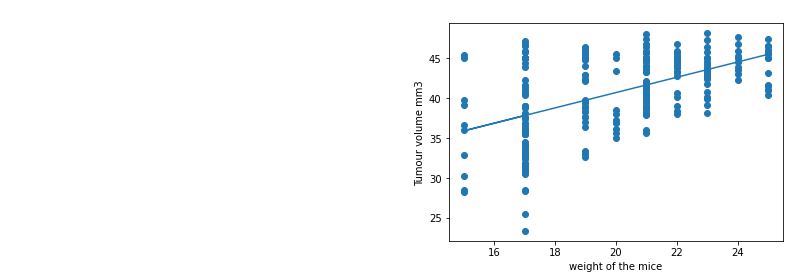

In [18]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(correlation_linear_weight, correlation_linear_volume)
regress_values = correlation_linear_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(correlation_linear_weight, correlation_linear_volume)
plt.plot(correlation_linear_weight, regress_values)
plt.annotate(line_eq,(0,50),fontsize=15, color="red")
plt.xlabel("weight of the mice")
plt.ylabel("Tumour volume mm3")
plt.show